In [6]:
# Do some imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



# Load data and process data
data_dir = "../data/"

In [2]:
def load_data(data_dir):
    train = pd.read_json(data_dir+"train.json")
    test = pd.read_json(data_dir+"test.json")
    # Fill 'na' angles with zero
    train.inc_angle = train.inc_angle.replace('na', 0)
    train.inc_angle = train.inc_angle.astype(float).fillna(0.0)
    test.inc_angle = test.inc_angle.replace('na', 0)
    test.inc_angle = test.inc_angle.astype(float).fillna(0.0)
    return train, test

train, test = load_data(data_dir)

In [3]:
# Process data into images
def process_images(df):
    X_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in df["band_1"]])
    X_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in df["band_2"]])
    # Merge bands and add another band as the mean of Band 1 and Band 2 (useful for the ImageDataGenerator later)
    imgs = np.concatenate([X_band1[:, :, :, np.newaxis]
                            , X_band2[:, :, :, np.newaxis]
                            ,((X_band1+X_band2)/2)[:, :, :, np.newaxis]], axis=-1)
    return imgs

X_train = process_images(train)
X_test = process_images(test)

X_angle_train = np.array(train.inc_angle)
X_angle_test = np.array(test.inc_angle)
y_train = np.array(train["is_iceberg"])

In [58]:
np.max(X_train[:,:,:,:])

34.574917

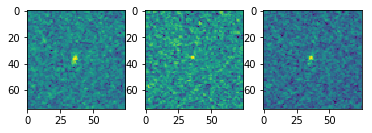

1


In [26]:
fig, ax = plt.subplots(1, 3)

ax[0].imshow(X_train[2,:,:,0])
ax[1].imshow(X_train[2,:,:,1])
ax[2].imshow(X_train[2,:,:,2])
plt.show()
print(y_train[2])

In [43]:
from PyEMD import EMD2D
import numpy as np

img = X_train[2,:,:,0]

# Perform decomposition
print("Performing decomposition... ", end="")
emd2d = EMD2D()
IMFs = emd2d.emd(img, max_imf=4)
imfNo = IMFs.shape[0]
print("Done")

Performing decomposition... Done


In [44]:
imfNo

2

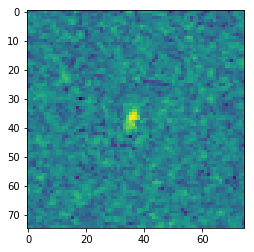

In [41]:
plt.imshow(IMFs_2D[0])
plt.show()

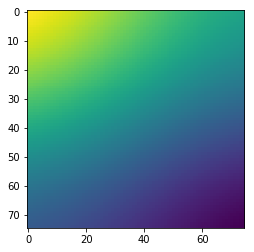

In [42]:
plt.imshow(IMFs_2D[1])
plt.show()